**Abstract**
Se presenta un modelo de clasificación de diabetes utilizando información del historial clínico y resultados de estudios de sangre para predecir si el paciente padece de diabetes. El resultado de dicha clasificación será posteriormente analizado y validado por profesionales médicos de MedicosArg, permitiendo agilizar el diagnostico y mejorando la atención al cliente, beneficiando al paciente y a la institución médica.

**Objetivo**

Generar un modelo que permita clasificar si el paciente es diabético o no.

**Contexto Comercial** 

Para aumentar la participación de mercado de MedicosArg, se identificó la opción de proveer servicios de diagnósticos de manera más agil y de forma online sin comprometer la calidad de dicha atención.
Como primer paso de este proyecto, se busca crear un modelo de clasificación de diabetes preciso que le permita al médico reducir el tiempo de diagnostico y tiempo de devolución, logrando mejorar la calidad del servicio y asi captar más clientes. 

**Problema Comercial**

No existe modelo perteneciente a la empresa que clasifique dicha enfermedad que permita minimizar costos de servicio para el paciente y honorarios profesionales que se le atribuye al profesional medico.

**Contexto Analítico**

Librerias a utilizar:

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OneHotEncoder

**Preguntas de interés**

1. ¿Cuáles son las características más relevantes o influyentes para predecir la diabetes en el dataset?
2. ¿Existe alguna correlación entre el índice de masa corporal (IMC) y la diabetes?
3. ¿Cómo se distribuye la edad en la población diabética del dataset?
4. ¿Hay alguna relación entre el nivel de glucosa en sangre y la presencia de diabetes?

**Data Acquisition**


In [43]:
df= pd.read_csv(r'C:\Users\moniq\Downloads\Datascience\entregas varias\diabetes_prediction_dataset.csv', sep=',')

Género: el género se refiere al sexo biológico del individuo, lo que puede tener un impacto en su susceptibilidad a la diabetes.

Edad: la edad es un factor importante, ya que la diabetes se diagnostica más comúnmente en adultos mayores. La edad oscila entre 0 y 80 años en nuestro conjunto de datos.

Hipertensión: La hipertensión es una condición médica en la que la presión arterial en las arterias se eleva de forma persistente.

Enfermedad cardíaca: La enfermedad cardíaca es otra condición médica que se asocia con un mayor riesgo de desarrollar diabetes.

Historial de tabaquismo: El historial de tabaquismo también se considera un factor de riesgo de diabetes. Representa el historial de tabaquismo del paciente.

IMC (Índice de Masa Corporal): El IMC (Índice de Masa Corporal) es una medida de la grasa corporal basada en el peso y la altura. Los pacientes con mayor IMC son conocidos por tener más riesgo de padecer diabetes.

Nivel de HbA1c: el nivel de HbA1c (hemoglobina A1c) es una medida del nivel promedio de azúcar en la sangre de una persona durante los últimos 2 a 3 meses.

Nivel de glucosa en sangre: El nivel de glucosa en sangre se refiere a la cantidad de glucosa en el torrente sanguíneo en un momento dado.

Diabetes: Representa al paciente si tiene diabetes o no. 0 es negativo, 1 es positivo.

**Data Wrangling**

In [44]:
#Datos duplicados
df = df.drop_duplicates()


Text(0.5, 1.0, 'Matrix de valores nulos')

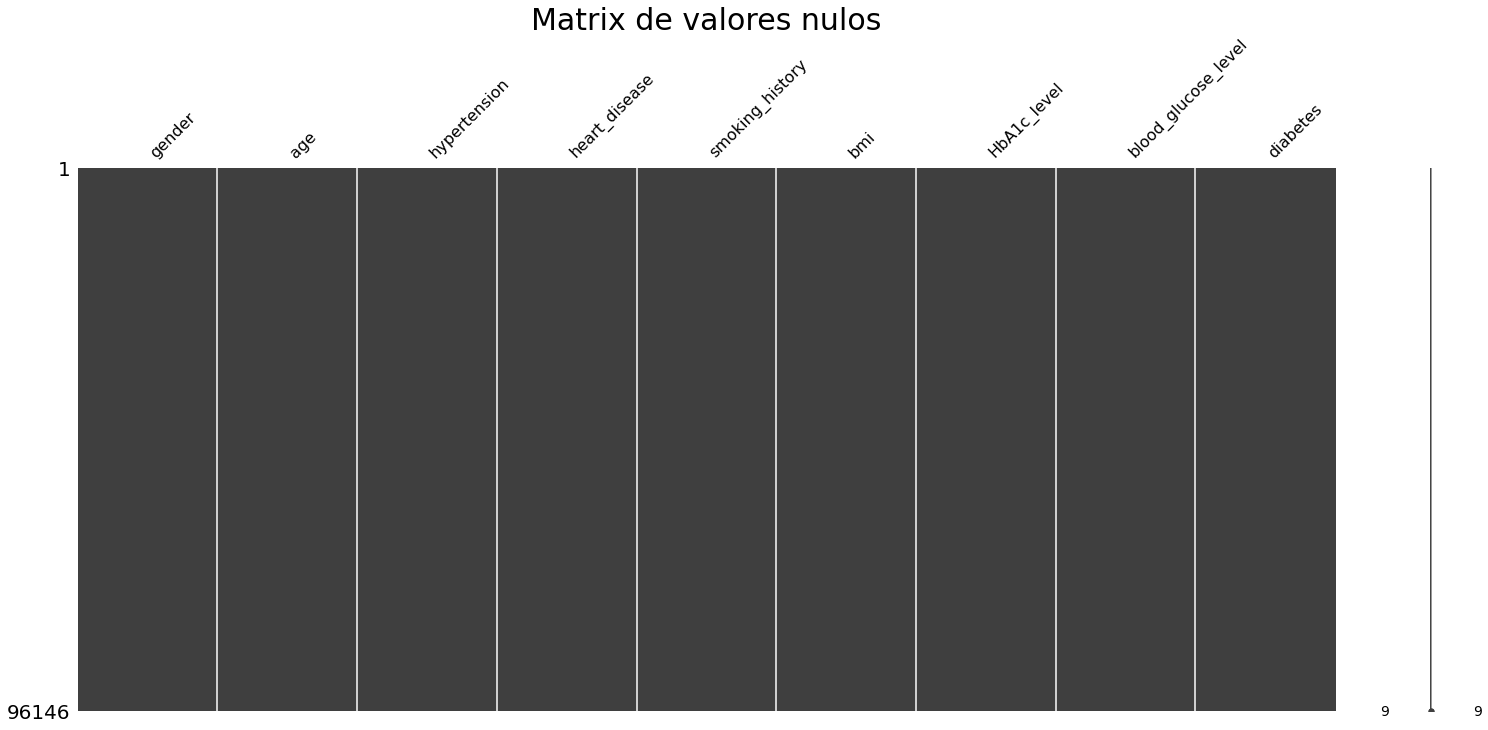

In [45]:
# Análisis y tratamiento de datos nulos
msno.matrix(df)
plt.title("Matrix de valores nulos",fontsize=30)

In [46]:
#df.info()

In [47]:
#df.describe().T

In [48]:
#Remuevo registros donde la edad es menor a 1. 
df = df[~df['age'].between(0, 0.99)]

In [49]:
#Remuevo registros donde género = otros
df = df[df['gender'] != 'Other']

In [50]:
#Normalizo valores
df['age'] = df['age'].astype('int')

**Exploratory Data Analysis**

Analizaremos primero la distribución de los datos del dataset en su conjunto y posteriormente analizaremos en detalle algunas variables en específico para con la intención de obtener insights a partir de las visualizaciones y así responder las preguntas de interés planteadas.

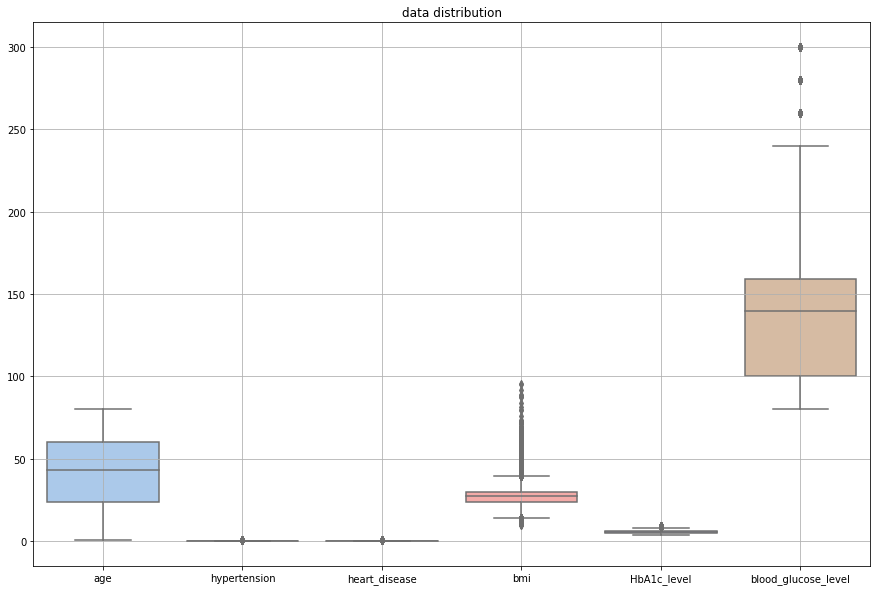

In [51]:
plt.figure(figsize=(15,10))
sns.boxplot(df.drop('diabetes',axis=1))
plt.title("data distribution")
plt.grid()

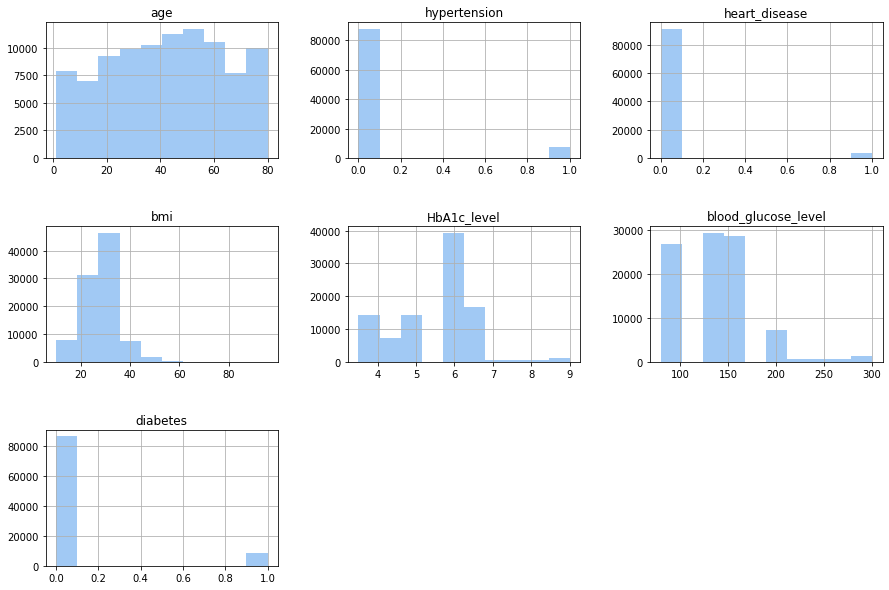

In [52]:
sns.set_palette("pastel")
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

De los dos graficos de arriba observamos que:
-la mediana de la edad de la población estudiada se encuentra por los 48 años aproximadamente.

-las variables hipertension y enfermedades cardiacas tienen la gran mayoría del conteo en 0 dado que son variables categóricas indicando que los individuos de esta población no cuentan con estos dos síntomas.

-La mediana del índice de masa muscular ronda por los 30, contando con varios casos de outliers superando los 45.

-El primer cuartil de la variable nivel de glucosa en la sangre ronda por los 100 con la mediana por los 140 y el tercer cuaril por los 155.

Text(0.5, 1.0, 'HbA1C diabético vs no diabético')

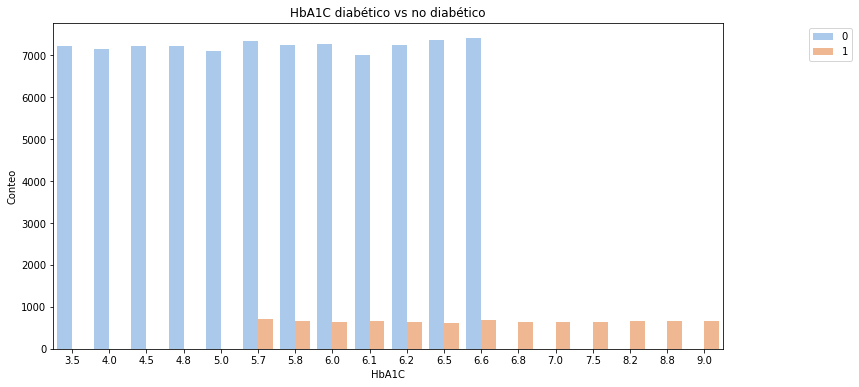

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x='HbA1c_level', hue='diabetes', data=df,palette='pastel')
plt.xlabel('HbA1C')
plt.ylabel('Conteo')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("HbA1C diabético vs no diabético")

Este gráfico nos indica que sería certero diagnosticar a una persona como diabetica si el nivel de HbA1C en la sangre supera los 6.8 y diagnosticarlo como no diabetico si el nivel es menor a 5.0. Quienes presenten valores >5.7 y <6.6 deberán realizar otros análisis complementarios para un correcto diagnostico.

Text(0.5, 1.0, 'Relación edad-índice masa corporal')

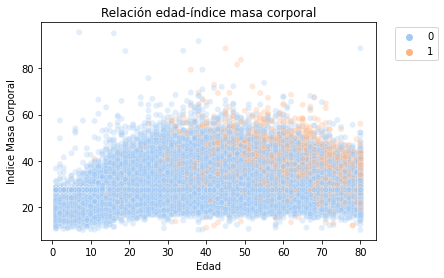

In [54]:
sns.scatterplot(x='age', y='bmi', data=df, hue = 'diabetes', alpha=0.3)
plt.xlabel('Edad')
plt.ylabel('Indice Masa Corporal')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Relación edad-índice masa corporal")

El gráfico scatterplot no muestra una fuerte correlación entre edad e índice de masa muscular. Sin embargo, sí se puede observar que hay una mayor presencia de casos diabeticos (puntos naranjas) cuando el índice de masa corporal sube y cuando la edad supera los 40 años. Esto es coherente ya que un alto índice de masa corporal indica un exceso de peso o obesidad y ésta está fuertemente asociado con un mayor riesgo de desarrollar diabetes que se puede observar en el siguiente gráfico.
En el caso de la edad, se encontró que la mayoría de los casos de diabetes se presentan en personas de mediana edad y mayores. 

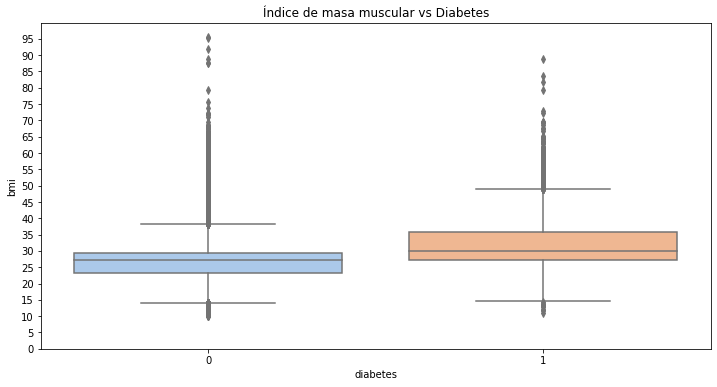

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('Índice de masa muscular vs Diabetes')


plt.yticks(range(0, int(df['bmi'].max()) + 1, 5))

plt.show()


Se observa que en el caso de los pacientes diabeticos, la mediana (30) del indice de masa muscular se encuentra por encima del cuartil 3 (28) de quienes no son diabeticos. Otra observación que se puede realizar es que el cuartil 3 de los no diabeticos se trasladaria al cuartil 2 de los diabeticos.

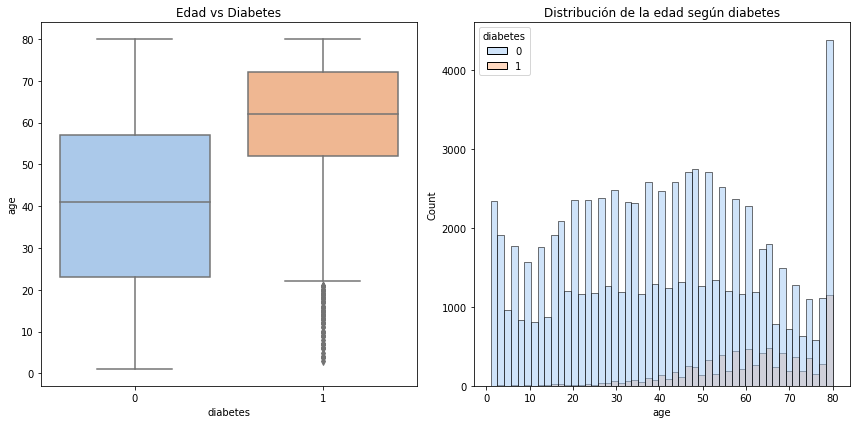

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Edad vs Diabetes')


plt.subplot(1, 2, 2) 
sns.histplot(data=df, x="age", hue='diabetes')
plt.title('Distribución de la edad según diabetes')

plt.tight_layout() 
plt.show()

Estos gráficos revelan que la edad sigue una distribución amplia en la población diabética.El cuartil 1 de quienes tienen diabetes se presenta en pacientes con más de 50 años, estando la mediana por los 62 años y el tercer cuartil por los 70 años.
Se encontró que la mayoría de los casos de diabetes se presentan en personas de mediana edad y mayores. Sin embargo, también se observó una gran cantidad de outliers de casos diabeticos en personas más jóvenes. 
Este hallazgo sugiere que la diabetes no está limitada únicamente a los grupos de mayor edad y que las personas de todas las edades deben estar conscientes de los factores de riesgo y llevar un estilo de vida saludable para prevenir su aparición.
Cabe destacar que la información del dataset para la variable edad tiene como valor máximo 80, por lo tanto se observa que para esta edad el conteo es relativamente más alto.  

Se observa a continuación la distribución de edad de la población diabética.

In [57]:
df_diabetes = df.loc[(df['diabetes'] == 1)]

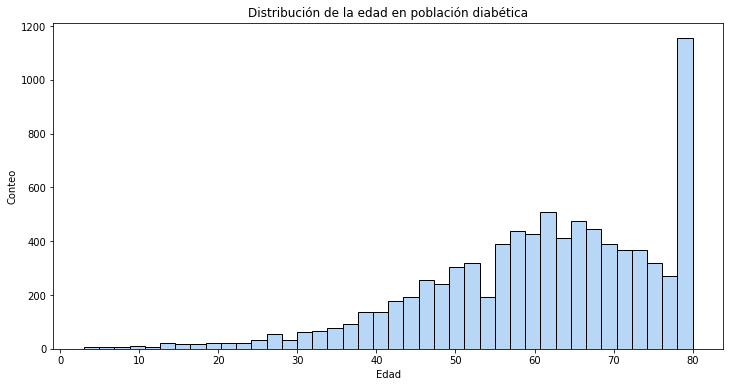

In [58]:
plt.figure(figsize=(12, 6));
sns.histplot(data=df_diabetes, x="age")
plt.title('Distribución de la edad en población diabética')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.show()

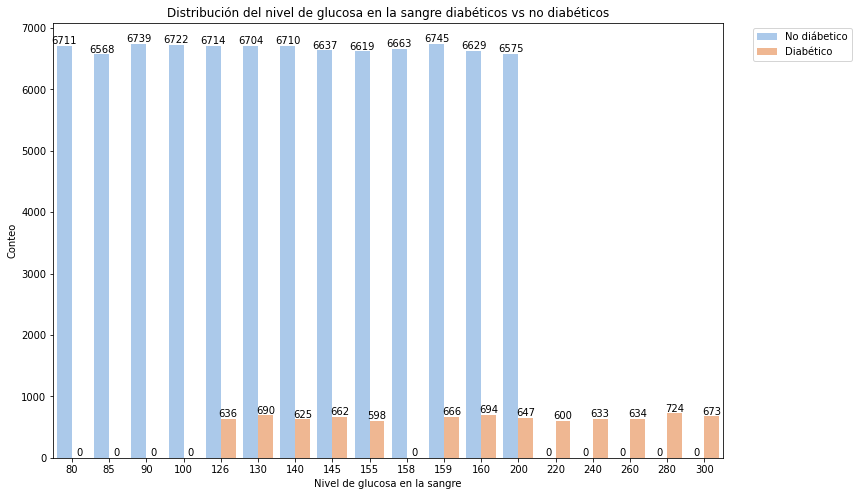

In [59]:
plt.figure(figsize=(12, 8))
labels = ['No diábetico', 'Diabético']
fig = sns.countplot(x="blood_glucose_level", hue ='diabetes', data=df, palette='pastel')
fig.bar_label(fig.containers[0], label_type='edge');

for container in fig.containers[1:]:
    fig.bar_label(container, label_type='edge')

plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Distribución del nivel de glucosa en la sangre diabéticos vs no diabéticos')
plt.xlabel('Nivel de glucosa en la sangre')
plt.ylabel('Conteo')
plt.show()

De manera similar al análisis realizado para la variable HbA1C, se podría diagnosticar no diabético a quienes tienen un nivel de glucosa menor a los 126 y diabético a aquellos con un nivel superior a los 200. Queda por analizar los casos con nivel de glucosa >126 y <200.

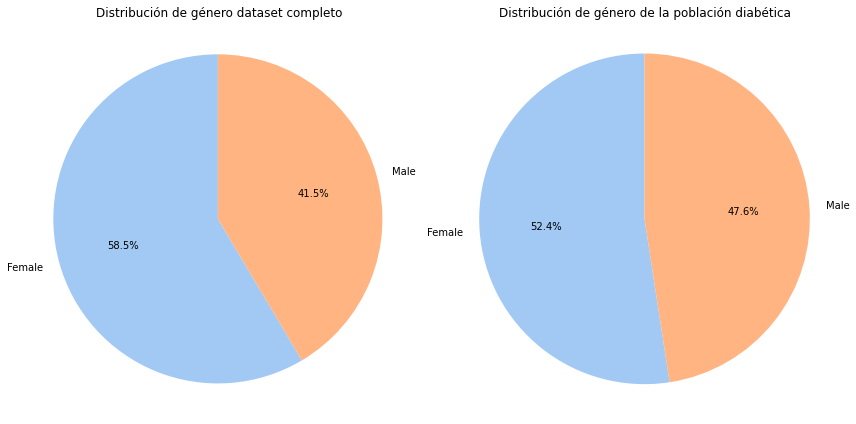

In [60]:
gender_counts = df['gender'].value_counts()

gender_counts_diabetes = df_diabetes['gender'].value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribución de género dataset completo')
ax1.axis('equal')

ax2.pie(gender_counts_diabetes, labels=gender_counts_diabetes.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribución de género de la población diabética')
ax2.axis('equal')

plt.tight_layout() 


**Insights y recomendaciones**

Durante el análisis exploratorio de datos para la detección de la diabetes con las variables mencionadas, se obtuvieron los siguientes insights:

Distribución de la edad: El análisis revelará la distribución de la edad de los individuos en el conjunto de datos. Se puede observar si existe una concentración particular en un rango de edad y si hay una prevalencia más alta de diabetes en ciertos grupos de edad, como adultos mayores.

Relación entre el género y la diabetes: Se pueden comparar las tasas de diabetes entre los géneros masculino y femenino. Revela no haber diferencias significativas en la prevalencia de la enfermedad entre ambos grupos.

Impacto del IMC en la diabetes: Se observa que en el caso de los pacientes diabeticos, la mediana (30) del indice de masa muscular se encuentra por encima del cuartil 3 (28) de quienes no son diabeticos. Otra observación que se puede realizar es que el cuartil 3 de los no diabeticos se trasladaria al cuartil 2 de los diabeticos.

Niveles de HbA1c y glucosa en sangre: El análisis de los niveles de HbA1c indica que sería correcto diagnosticar como diábetico a quienes tienen un nivel de HbA1C superior a 6.8 y no diabético a quienes tienen un nivel inferior a los 5.7. En cuanto al nivel de glucosa en la sangre, se podría diagnosticar no diabético a quienes tienen un nivel de glucosa menor a los 126 y diabético a aquellos con un nivel superior a los 200.

Estos insights proporcionarán una visión general de las variables y su impacto en la detección de la diabetes. Sin embargo, es importante tener en cuenta que estos resultados están basados en un análisis exploratorio y podrían requerir un análisis más avanzado y modelos de predicción para obtener conclusiones más sólidas.

Recomendaciones:

1. Dar un diagnostico preliminar indicando no diabetico a pacientes si el nivel de HbA1c es <5.7 y nivel de glucosa <126 y diabetico si HbA1c>6.8 o nivel de glucosa >200 respectivamente.

2. Dar un diagnostico preliminar indicando diabetes si el indice de masa muscular es de >= 30.

